In [54]:
"""
특성 공학과 규제
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [55]:
"""
데이터 준비하기
"""

df = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full = df.to_numpy()
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
\
print("df: ", df[:5])
print("perch_full: ", perch_full[:5])
print("perch_weight: ", perch_weight[:5])

df:     length   height   width
0     8.4     2.11    1.41
1    13.7     3.53    2.00
2    15.0     3.82    2.43
3    16.2     4.59    2.63
4    17.4     4.59    2.94
perch_full:  [[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]
perch_weight:  [ 5.9 32.  40.  51.5 70. ]


In [56]:
"""
훈련용과 테스트용 데이터 분리
"""

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)
print("train_input: ", train_input[:5])
print("train_target: ", train_target[:5])
print("test_input: ", test_input[:5])
print("test_target: ", test_target[:5])

train_input:  [[19.6   5.14  3.04]
 [22.    5.88  3.52]
 [18.7   5.2   3.12]
 [17.4   4.59  2.94]
 [36.   10.61  6.74]]
train_target:  [ 85. 135.  78.  70. 700.]
test_input:  [[ 8.4   2.11  1.41]
 [18.    5.22  3.32]
 [27.5   7.28  4.57]
 [21.3   6.38  3.53]
 [22.5   5.86  3.62]]
test_target:  [  5.9 100.  250.  130.  130. ]


In [57]:
"""
다항특성변환기 테스트
"""

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print("poly.transform: ", poly.transform([[2, 3]]))

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print("poly.transform: ", poly.transform([[2, 3]]))

poly.transform:  [[1. 2. 3. 4. 6. 9.]]
poly.transform:  [[2. 3. 4. 6. 9.]]


In [58]:
"""
테스트 데이터에 다항특성변환기 사용
"""

# train_input: [19.6, 5.14, 3.04]
# train_poly:  [19.6, 5.14, 3.04, 384.16, 100.744, 59.584, 26.4196, 15.6256, 9.2416]
# train_poly:  [x,    y,    z,    x**2,   x*y,     x*z,    y**2,    y*z,     z**2]
print("train_input: ", train_input[:5])

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

print("poly.get_geature_names_out: ", poly.get_feature_names_out())  # get_feature_names_out(): 전처리된 결과의 특성 이름 얻기.
print("train_poly: ", train_poly[:5])
print("train_target: ", train_target[:5])
print("train_poly.shape", train_poly.shape)

train_input:  [[19.6   5.14  3.04]
 [22.    5.88  3.52]
 [18.7   5.2   3.12]
 [17.4   4.59  2.94]
 [36.   10.61  6.74]]
poly.get_geature_names_out:  ['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']
train_poly:  [[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]]
train_target:  [ 85. 135.  78.  70. 700.]
train_poly.shape (42, 9)


In [59]:
"""
다항특성변환기를 적용한 테스트와 훈련 데이터를 이용, 선형회귀 훈련 후 성적 확인
"""

from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly  = poly.transform(test_input)

# train_poly: 특성값 (길이, 폭, 너비, x^2, y^2, z^2, xy, xz, yz)
# train_target: 결과값 (weight)
lr = LinearRegression()
lr.fit(train_poly, train_target)
print("train score: ", lr.score(train_poly, train_target))
print("test score: ", lr.score(test_poly, test_target))

train score:  0.9903183436982126
test score:  0.9714559911594125


In [60]:
"""
다항특성을 더 만들어서 훈련 후 성적 확인.
"""

poly = PolynomialFeatures(degree=5, include_bias=False)  # degree
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly  = poly.transform(test_input)

print("train_poly.shape: ", train_poly.shape)
print("train_poly[0] ", train_poly[0])

# train_poly: 특성값 (길이, 폭, 너비, x^2, y^2, z^2, xy, xz, yz)
# train_target: 결과값 (weight)
lr = LinearRegression()
lr.fit(train_poly, train_target)
print("train score: ", lr.score(train_poly, train_target))
print("test score: ", lr.score(test_poly, test_target))

# 과대적합 결과가 나옴. 특성 개수를 늘리면 훈련 세트에 대해서는 성적이 좋으나,
# 테스트 세트에서 형편없는 성적이 나옴 (-144.405)

train_poly.shape:  (42, 55)
train_poly[0]  [1.96000000e+01 5.14000000e+00 3.04000000e+00 3.84160000e+02
 1.00744000e+02 5.95840000e+01 2.64196000e+01 1.56256000e+01
 9.24160000e+00 7.52953600e+03 1.97458240e+03 1.16784640e+03
 5.17824160e+02 3.06261760e+02 1.81135360e+02 1.35796744e+02
 8.03155840e+01 4.75018240e+01 2.80944640e+01 1.47578906e+05
 3.87018150e+04 2.28897894e+04 1.01493535e+04 6.00273050e+03
 3.55025306e+03 2.66161618e+03 1.57418545e+03 9.31035750e+02
 5.50651494e+02 6.97995264e+02 4.12822102e+02 2.44159375e+02
 1.44405545e+02 8.54071706e+01 2.89254655e+06 7.58555575e+05
 4.48639873e+05 1.98927329e+05 1.17653518e+05 6.95849599e+04
 5.21676772e+04 3.08540347e+04 1.82483007e+04 1.07927693e+04
 1.36807072e+04 8.09131319e+03 4.78552376e+03 2.83034868e+03
 1.67398054e+03 3.58769566e+03 2.12190560e+03 1.25497919e+03
 7.42244501e+02 4.38992857e+02 2.59637799e+02]
train score:  0.9999999999997232
test score:  -144.40564483377855


In [61]:
"""
규제(릿지회귀, 라쏘회귀) 사용하기
"""

from sklearn.preprocessing import StandardScaler

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)  # train_input > PolynomialFeatures > train_poly

# 특성값 스케일을 표준점수로 정규화해서 사용하기 위해 StandardScaler 변환기를 사용한다.
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)  # train_poly > StandardScaler > train_scaled
test_scaled = ss.transform(test_poly)  # test_poly > StandardScaler > test_scaled

print("train_poly[0]: ", train_poly[0])
print("train_scaled[0]: ", train_scaled[0])

lr = LinearRegression()
lr.fit(train_scaled, train_target)
print("train score: ", lr.score(train_scaled, train_target))
print("test score: ", lr.score(test_scaled, test_target))

train_poly[0]:  [1.96000000e+01 5.14000000e+00 3.04000000e+00 3.84160000e+02
 1.00744000e+02 5.95840000e+01 2.64196000e+01 1.56256000e+01
 9.24160000e+00 7.52953600e+03 1.97458240e+03 1.16784640e+03
 5.17824160e+02 3.06261760e+02 1.81135360e+02 1.35796744e+02
 8.03155840e+01 4.75018240e+01 2.80944640e+01 1.47578906e+05
 3.87018150e+04 2.28897894e+04 1.01493535e+04 6.00273050e+03
 3.55025306e+03 2.66161618e+03 1.57418545e+03 9.31035750e+02
 5.50651494e+02 6.97995264e+02 4.12822102e+02 2.44159375e+02
 1.44405545e+02 8.54071706e+01 2.89254655e+06 7.58555575e+05
 4.48639873e+05 1.98927329e+05 1.17653518e+05 6.95849599e+04
 5.21676772e+04 3.08540347e+04 1.82483007e+04 1.07927693e+04
 1.36807072e+04 8.09131319e+03 4.78552376e+03 2.83034868e+03
 1.67398054e+03 3.58769566e+03 2.12190560e+03 1.25497919e+03
 7.42244501e+02 4.38992857e+02 2.59637799e+02]
train_scaled[0]:  [-1.01339619 -1.01007487 -1.01952321 -0.9549757  -0.9496784  -0.95745849
 -0.93942079 -0.94342509 -0.94100107 -0.88757122 -0.8

In [62]:
"""
릿지 회귀 사용해보기
"""

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print("ridge_train_score: ", ridge.score(train_scaled, train_target))
print("ridge_test_score: ", ridge.score(test_scaled, test_target))

ridge_train_score:  0.9896101671037343
ridge_test_score:  0.9790693977615387


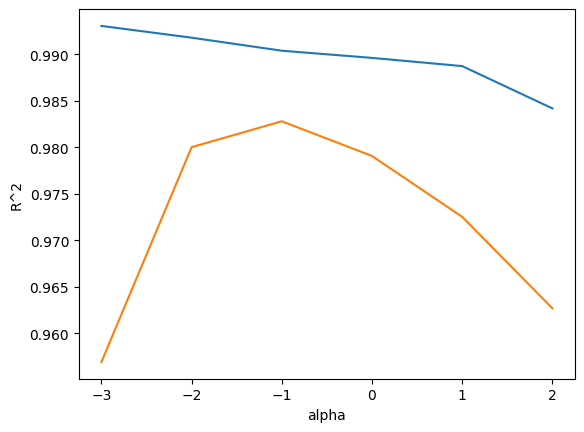

ridge_train_scores:  [0.9930455252088248, 0.991780998125052, 0.9903815817570367, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
ridge_test_scores:  [0.9569388961567329, 0.9800187936871725, 0.9827976465386928, 0.9790693977615387, 0.9725329582461569, 0.9627042641050291]


In [63]:
"""
릿지 회귀 alpha값별 점수 확인해보기
"""

import matplotlib.pyplot as plt

ridge_train_scores = []
ridge_test_scores = []
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    ridge_train_scores.append(ridge.score(train_scaled, train_target))
    ridge_test_scores.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alphas), ridge_train_scores)
plt.plot(np.log10(alphas), ridge_test_scores)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show() # blue: ridge_train_scores, ornage: ridge_test_scores

print("ridge_train_scores: ", ridge_train_scores)
print("ridge_test_scores: ", ridge_test_scores)

In [64]:
"""
릿지회귀: alpha 테스트로 얻은 최적 alpha(0.1)로 최종 점수 확인
"""

print("train_scaled[0]: ", train_scaled[0])
print("train_target[0]: ", train_target[0])
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print("ridge_train_score: ", ridge.score(train_scaled, train_target)) # 0.9903
print("ridge_test_score: ", ridge.score(test_scaled, test_target)) # 0.9827

train_scaled[0]:  [-1.01339619 -1.01007487 -1.01952321 -0.9549757  -0.9496784  -0.95745849
 -0.93942079 -0.94342509 -0.94100107 -0.88757122 -0.88399964 -0.89100599
 -0.87785292 -0.88311456 -0.88430909 -0.8691891  -0.87259422 -0.87147928
 -0.86603533 -0.82233944 -0.82171953 -0.8280588  -0.81928269 -0.82512549
 -0.8278857  -0.81486775 -0.82006923 -0.82177279 -0.82010716 -0.80835934
 -0.81274154 -0.81321125 -0.8098514  -0.80275974 -0.7637909  -0.76597773
 -0.77150714 -0.76668667 -0.77246614 -0.77577893 -0.76571689 -0.77162398
 -0.77472752 -0.77517751 -0.76290623 -0.76877311 -0.77148634 -0.77113383
 -0.767785   -0.75814062 -0.76376113 -0.76586966 -0.76449499 -0.75967179
 -0.75143746]
train_target[0]:  85.0
ridge_train_score:  0.9903815817570367
ridge_test_score:  0.9827976465386928


In [65]:
"""
라쏘회귀 사용해보기
"""

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print("lasso_train_score: ", lasso.score(train_scaled, train_target))  # 0.9897
print("lasso_test_score: ", lasso.score(test_scaled, test_target))  # 0.98005

lasso_train_score:  0.989789897208096
lasso_test_score:  0.9800593698421883


d:\hg-mldl\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.238e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


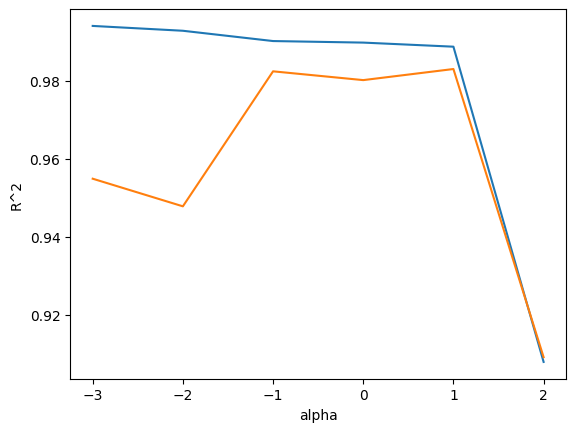

lasso_train_scores:  [0.9940913138606078, 0.9928491137449734, 0.9902080238600284, 0.9898116789062786, 0.9887624603020236, 0.9078618674946646]
lasso_test_scores:  [0.954881601354962, 0.947791689113353, 0.9824382983968606, 0.9801844137326112, 0.9830309645308443, 0.9090772073024512]
lasso_train_scores:  0.9888067471131867
lasso_test_scores:  0.9824470598706695


In [66]:
"""
라쏘회귀 최적 alpha 찾기
"""

lasso_train_scores = []
lasso_test_scores = []
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=200_000)  # max_iter를 높여야 ConvergencWarning 경고가 안뜸. 최적의 계수를 찾기 위한 반복횟수가 더 필요할 때 나옴.
    lasso.fit(train_scaled, train_target)
    lasso_train_scores.append(lasso.score(train_scaled, train_target))
    lasso_test_scores.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alphas), lasso_train_scores)
plt.plot(np.log10(alphas), lasso_test_scores)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()  # blue: lasso_train_scores, orange: lasso_test_scores
print("lasso_train_scores: ", lasso_train_scores)
print("lasso_test_scores: ", lasso_test_scores)

lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print("lasso_train_scores: ", lasso.score(train_scaled, train_target))  # 0.9888
print("lasso_test_scores: ", lasso.score(test_scaled, test_target))  # 0.9824

In [67]:
"""
라쏘회귀는 0인 계수를 만들 수 있다.
"""

print("lasso.coef_: ", lasso.coef_)
print("count of zero lasso.coef_: ", np.sum(lasso.coef_ == 0))

lasso.coef_:  [ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
count of zero lasso.coef_:  40
